# UPI Transactions Data Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the UPI Transactions data
upi_df = pd.read_excel('UPI+Transactions.xlsx', sheet_name='Sheet1')
upi_df.head()

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
0,TXN00001,2024-02-02,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,17:12:14,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,123456789013,987654321013
1,TXN00002,2024-03-03,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,11:15:02,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,123456789014,987654321014
2,TXN00003,2024-04-04,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,21:29:39,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,123456789015,987654321015
3,TXN00004,2024-05-05,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,06:27:36,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,123456789016,987654321016
4,TXN00005,2024-06-06,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,02:06:22,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,123456789017,987654321017


In [3]:
# Check for missing values
upi_df.isnull().sum()

TransactionID            0
TransactionDate          0
Amount                   0
BankNameSent             0
BankNameReceived         0
RemainingBalance         0
City                     0
Gender                   0
TransactionType          0
Status                   0
TransactionTime          0
DeviceType               0
PaymentMethod            0
MerchantName             0
Purpose                  0
CustomerAge              0
PaymentMode              0
Currency                 0
CustomerAccountNumber    0
MerchantAccountNumber    0
dtype: int64

In [4]:
# Describe statistics
upi_df.describe(include='all')

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
count,20000,20000,20000.000000,20000,20000,20000.000000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000.000000,20000,20000,2.000000e+04,2.000000e+04
unique,20000,NaN,NaN,4,4,NaN,4,2,2,2,17887,3,3,5,5,NaN,2,4,NaN,NaN
top,TXN00001,NaN,NaN,SBI Bank,HDFC Bank,NaN,Delhi,Female,Transfer,Success,02:58:01,Tablet,Phone Number,Amazon,Food,NaN,Scheduled,USD,NaN,NaN
freq,1,NaN,NaN,5000,5000,NaN,5000,10000,10000,16000,4,6667,6667,4000,4000,NaN,10000,5000,NaN,NaN
mean,NaN,2024-06-30 19:36:37.440000,993.613702,NaN,NaN,5020.540871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.500000,NaN,NaN,1.234568e+11,9.876543e+11
min,NaN,2024-01-01 00:00:00,0.050000,NaN,NaN,0.530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1.234568e+11,9.876543e+11
25%,NaN,2024-04-02 00:00:00,498.075000,NaN,NaN,2528.485000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.750000,NaN,NaN,1.234568e+11,9.876543e+11
50%,NaN,2024-06-30 00:00:00,983.395000,NaN,NaN,5024.515000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.500000,NaN,NaN,1.234568e+11,9.876543e+11
75%,NaN,2024-09-27 00:00:00,1494.380000,NaN,NaN,7531.245000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.250000,NaN,NaN,1.234568e+11,9.876543e+11
max,NaN,2024-12-30 00:00:00,1999.870000,NaN,NaN,9999.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,1.234568e+11,9.876543e+11


In [5]:
# Top 10 highest amount transactions
top_10_amount = upi_df.sort_values(by='Amount', ascending=False).head(10)
top_10_amount

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
6824,TXN07137,2024-10-28,1999.87,SBI Bank,HDFC Bank,8242.26,Delhi,Female,Transfer,Success,21:52:43,Mobile,UPI ID,Zomato,Travel,37,Scheduled,USD,123456796149,987654328149
9865,TXN10178,2024-03-09,1999.47,ICICI Bank,SBI Bank,8873.73,Bangalore,Male,Payment,Success,00:15:14,Laptop,QR Code,Swiggy,Bill Payment,38,Instant,EUR,123456799190,987654331190
3747,TXN04060,2024-05-11,1999.42,HDFC Bank,ICICI Bank,8528.30,Mumbai,Male,Payment,Failed,09:34:23,Tablet,Phone Number,Flipkart,Shopping,40,Instant,INR,123456793072,987654325072
8221,TXN08534,2024-03-15,1999.40,ICICI Bank,SBI Bank,9040.69,Bangalore,Male,Payment,Success,23:44:24,Laptop,QR Code,IRCTC,Others,34,Instant,EUR,123456797546,987654329546
4819,TXN05132,2024-09-03,1999.40,HDFC Bank,ICICI Bank,9037.86,Mumbai,Male,Payment,Success,23:28:18,Laptop,QR Code,Zomato,Travel,32,Instant,INR,123456794144,987654326144
7871,TXN08184,2024-01-25,1999.29,HDFC Bank,ICICI Bank,4286.90,Mumbai,Male,Payment,Success,14:31:06,Mobile,UPI ID,IRCTC,Others,44,Instant,INR,123456797196,987654329196
561,TXN00874,2024-11-05,1999.27,ICICI Bank,SBI Bank,7123.51,Bangalore,Male,Payment,Success,17:18:19,Tablet,Phone Number,IRCTC,Others,54,Instant,EUR,123456789886,987654321886
12051,TXN12364,2024-05-05,1999.24,HDFC Bank,ICICI Bank,1773.91,Mumbai,Male,Payment,Success,07:38:09,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,123456801376,987654333376
12986,TXN13299,2024-04-10,1999.02,Axis Bank,Axis Bank,722.91,Hyderabad,Female,Transfer,Success,03:27:26,Mobile,UPI ID,IRCTC,Others,39,Scheduled,GBP,123456802311,987654334311
4279,TXN04592,2024-09-03,1998.96,HDFC Bank,ICICI Bank,5325.12,Mumbai,Male,Payment,Success,19:37:42,Laptop,QR Code,Zomato,Travel,52,Instant,INR,123456793604,987654325604


In [6]:
# Top 10 most frequent merchants
top_merchants = upi_df['MerchantName'].value_counts().head(10)
top_merchants

MerchantName
Amazon      4000
Zomato      4000
Swiggy      4000
IRCTC       4000
Flipkart    4000
Name: count, dtype: int64

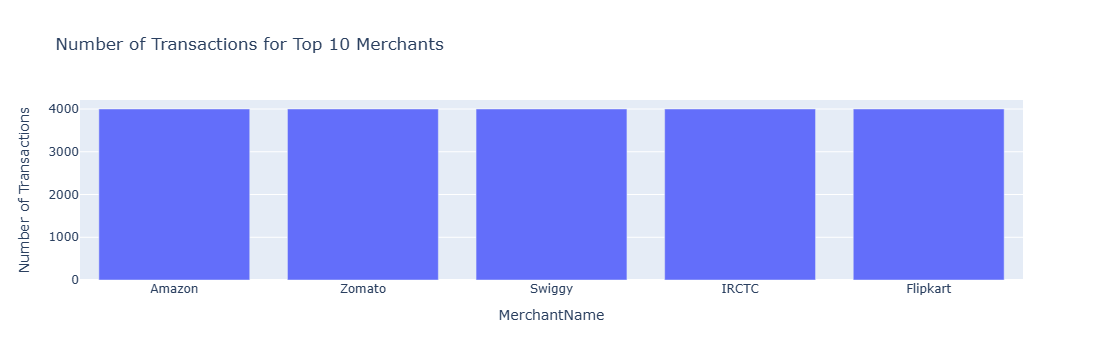

In [11]:
# Bar chart: Number of transactions for top 10 merchants
merchant_counts = upi_df['MerchantName'].value_counts().head(10)
fig = px.bar(
    merchant_counts,
    x=merchant_counts.index,
    y=merchant_counts.values,
    title='Number of Transactions for Top 10 Merchants',
    labels={'x': 'Merchant Name', 'y': 'Number of Transactions'}
)
fig.show()

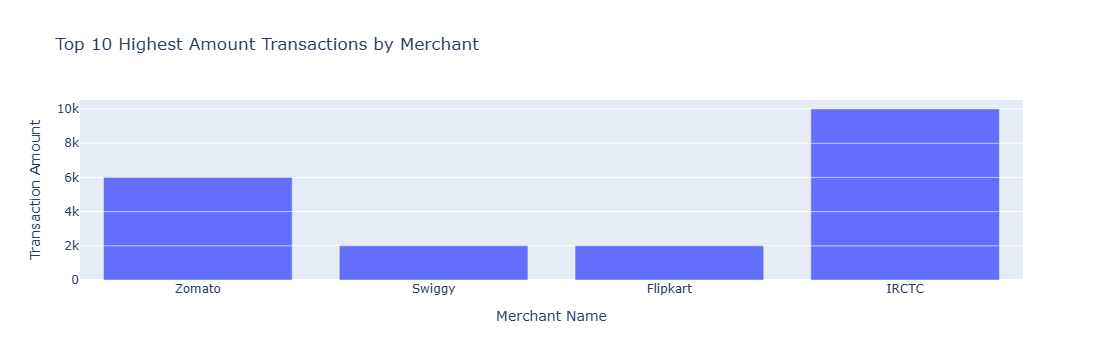

In [9]:
# Bar chart: Top 10 transactions by amount
fig2 = px.bar(
    top_10_amount,
    x='MerchantName',
    y='Amount',
    title='Top 10 Highest Amount Transactions by Merchant',
    labels={'MerchantName': 'Merchant Name', 'Amount': 'Transaction Amount'}
)
fig2.show()